# Simulación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta
from scipy.stats import pareto
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import t
from scipy.stats import norm

### Bases de datos

In [2]:
# Bases de datos histórica

# Ventas categorizadas y asignación resultante
bdd_ventas = pd.read_excel("BDD_Bodegas_Categorizada.xlsx")
bdd_asignaciones = pd.read_excel("Resultados/datos_aloc_p_3_manhattan.xlsx")
bdd_ventas['Fecha'] = pd.to_datetime(bdd_ventas['Fecha'])
bdd_ventas['Semana'] = bdd_ventas['Fecha'].dt.strftime('%U')
bdd_ventas['Año'] = bdd_ventas['Fecha'].dt.year
bdd_ventas['Año-Sem'] = bdd_ventas['Año'].astype(str) + "-" + bdd_ventas['Semana'].astype(str)
bdd_asignaciones = bdd_asignaciones.drop(columns=['Cantidad'])


#Comunas
bdd_comunas = pd.read_excel("BDD_Bodegas.xlsx", sheet_name=3)

# Agrupación de ventas por cliente 
bdd_ventas_agrupadas = bdd_ventas.groupby(['ID Cliente', 'Año-Sem']).agg({"Cantidad": "sum", 'Categoria': 'first'}).reset_index()
bdd_ventas_agrupadas['Cantidad'] = bdd_ventas_agrupadas['Cantidad'].apply(lambda x: 0.01 if x == 0 else x)
bdd_historica = bdd_ventas_agrupadas.merge(bdd_asignaciones, right_on = "Unnamed: 0", left_on ="ID Cliente")

## Resultados
resultado_1 = bdd_historica.groupby(['Bodega Asignada', 'Año-Sem'])['Cantidad'].sum().reset_index()

In [3]:
# Bases de datos proyección

# Ventas categorizadas y asignación resultante
bdd_ventas = pd.read_excel("BDD_Bodegas_Categorizada_proy.xlsx")
bdd_asignaciones = pd.read_excel("Resultados/datos_aloc_p_3_manhattan_proy.xlsx")
bdd_ventas['Fecha'] = pd.to_datetime(bdd_ventas['Fecha'])
bdd_ventas['Semana'] = bdd_ventas['Fecha'].dt.strftime('%U')
bdd_ventas['Año'] = bdd_ventas['Fecha'].dt.year
bdd_ventas['Año-Sem'] = bdd_ventas['Año'].astype(str) + "-" + bdd_ventas['Semana'].astype(str)
bdd_asignaciones = bdd_asignaciones.drop(columns=['Cantidad'])

#Comunas
bdd_comunas = pd.read_excel("BDD_Bodegas.xlsx", sheet_name=3)

# Agrupación de ventas por cliente 
bdd_ventas_agrupadas = bdd_ventas.groupby(['ID Cliente', 'Año-Sem']).agg({"Cantidad": "sum", 'Categoria': 'first'}).reset_index()
bdd_ventas_agrupadas['Cantidad'] = bdd_ventas_agrupadas['Cantidad'].apply(lambda x: 0.01 if x == 0 else x)
bdd_proyeccion = bdd_ventas_agrupadas.merge(bdd_asignaciones, right_on = "Unnamed: 0", left_on ="ID Cliente")

## Resultados
resultado_2 = bdd_proyeccion.groupby(['Bodega Asignada', 'Año-Sem'])['Cantidad'].sum().reset_index()

In [4]:
# Determinamos el año y la semana de cada resultado de la base de datos
resultado_1["Semana"] = resultado_1["Año-Sem"].str.split("-").str[1]
resultado_1["Año"] = resultado_1["Año-Sem"].str.split("-").str[0]

resultado_2["Semana"] = resultado_2["Año-Sem"].str.split("-").str[1]
resultado_2["Año"] = resultado_2["Año-Sem"].str.split("-").str[0]

#Juntamos las bases de datos de resultado_1 y resultado_2
resultado_3 = pd.concat([resultado_1, resultado_2])

resultado_3["Semana"] = resultado_3["Año-Sem"].str.split("-").str[1]
resultado_3["Año"] = resultado_3["Año-Sem"].str.split("-").str[0]
bodegas = {1: resultado_3[resultado_3["Bodega Asignada"]==1], 4: resultado_3[resultado_3["Bodega Asignada"]==4], 8: resultado_3[resultado_3["Bodega Asignada"]==8]}



C:\Users\U\AppData\Local\Temp\ipykernel_2320\4077897285.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Semana"] = data["Semana"].astype(int)
C:\Users\U\AppData\Local\Temp\ipykernel_2320\4077897285.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Semana"] = data["Semana"].astype(int)
C:\Users\U\AppData\Local\Temp\ipykernel_2320\4077897285.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

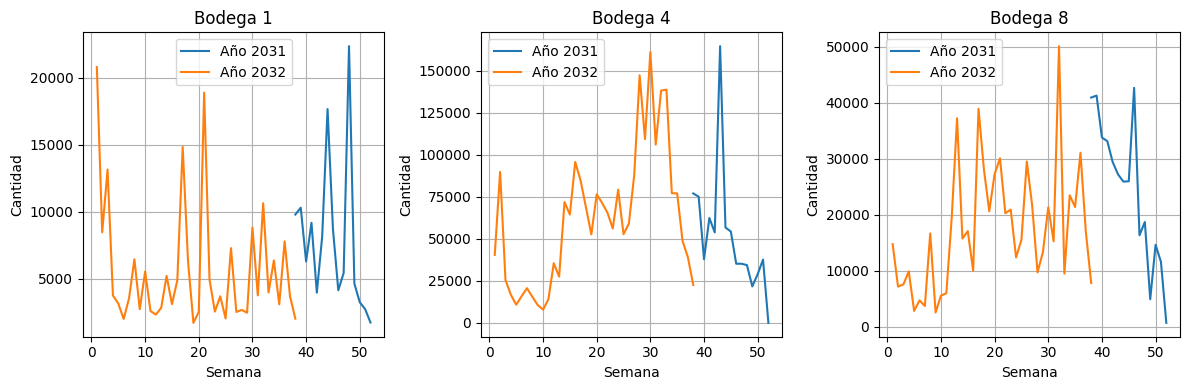

In [5]:

bodegas = {1: resultado_3[resultado_3["Bodega Asignada"]==1], 4: resultado_3[resultado_3["Bodega Asignada"]==4], 8: resultado_3[resultado_3["Bodega Asignada"]==8]}

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila y 3 columnas para los tres gráficos

for i, bodega in enumerate([1, 4, 8]):
    for año in ["2031","2032"]:#"2017","2018","2019","2020","2021","2022"
        data = bodegas[bodega][bodegas[bodega]["Año"] == año]
        data["Semana"] = data["Semana"].astype(int)
        data = data[data["Semana"] > 0]
        #data = data[data["Semana"] < 14]
        axs[i].plot(data['Semana'], data['Cantidad'], label=f'Año {año}')

    axs[i].set_xlabel('Semana')
    axs[i].set_ylabel('Cantidad')
    axs[i].set_title(f'Bodega {bodega}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()  
plt.show()




### Proyección

#### Separación de semanas y ajuste a distribución

In [6]:
# Filtramos los años de proyección
resultado_3 = resultado_3[resultado_3["Año"] > "2030"]

# Hacemos 3 dataframes, uno por bodega
bod_1 = resultado_3[resultado_3["Bodega Asignada"] == 1]
bod_4 = resultado_3[resultado_3["Bodega Asignada"] == 4]
bod_8 = resultado_3[resultado_3["Bodega Asignada"] == 8]

# Definimos una función para simplificar el filtrado por semana
def filtrar_semana(df, semanas_alto, semanas_promedio):
    df_alto = df[df["Semana"].astype(int).isin(semanas_alto)]
    df_promedio = df[df["Semana"].astype(int).isin(semanas_promedio)]
    return df_alto, df_promedio

# Definimos las semanas altas y promedio para cada bodega
semanas_alto_bod_1 = [1, 2, 3, 4, 15, 16, 17, 18, 19, 20, 21, 22, 23, 42, 43, 44, 45, 46, 47, 48, 49, 50]
semanas_promedio_bod_1 = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 51, 52]

semanas_alto_bod_4 = [1, 2, 3, 4, 14, 15, 16, 17, 18, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 42, 43]
semanas_promedio_bod_4 = [5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 20, 21, 22, 23, 24, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52]

semanas_alto_bod_8 = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
semanas_promedio_bod_8 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 47, 48, 49, 50, 51, 52]

lista_semanas = [semanas_alto_bod_1, semanas_promedio_bod_1, semanas_alto_bod_4, semanas_promedio_bod_4, semanas_alto_bod_8, semanas_promedio_bod_8]

# Aplicamos la función de filtrado por semana a cada bodega
bod_1_alto, bod_1_prom = filtrar_semana(bod_1, semanas_alto_bod_1, semanas_promedio_bod_1)
bod_4_alto, bod_4_prom = filtrar_semana(bod_4, semanas_alto_bod_4, semanas_promedio_bod_4)
bod_8_alto, bod_8_prom = filtrar_semana(bod_8, semanas_alto_bod_8, semanas_promedio_bod_8)


In [7]:
lista_bdd = [bod_1_alto, bod_1_prom, bod_4_alto, bod_4_prom, bod_8_alto, bod_8_prom]
nombres_bdd = ["bod_1_alto", "bod_1_prom", "bod_4_alto", "bod_4_prom", "bod_8_alto", "bod_8_prom"]

C:\Users\U\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


La mejor distribución para Bodega bod_1_alto es gamma con parámetros (0.839534223060924, 1693.6521090196798, 7439.346429482091)
Estadístico KS: 0.11413816071930054
P-valor: 2.0918225026017915e-07


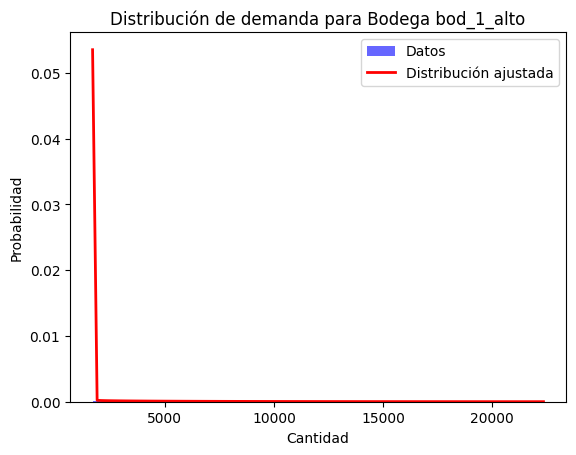

La mejor distribución para Bodega bod_1_prom es expon con parámetros (1723.0996121571309, 3014.0032417687344)
Estadístico KS: 0.10183774831265202
P-valor: 1.0524044214804966e-10


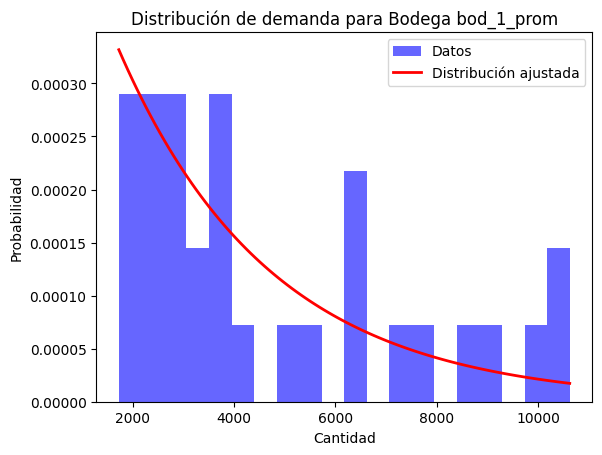

La mejor distribución para Bodega bod_4_alto es gamma con parámetros (10.332895137833715, -45375.18156525183, 12881.314719822529)
Estadístico KS: 0.11064620391312341
P-valor: 2.8582145605165936e-07


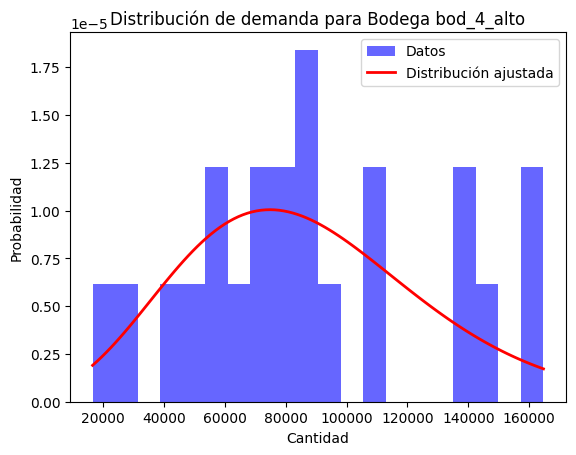

La mejor distribución para Bodega bod_4_prom es gamma con parámetros (6.027729706926033, -18988.13898555771, 9692.76721393541)
Estadístico KS: 0.09614569965798692
P-valor: 5.695405185562476e-11


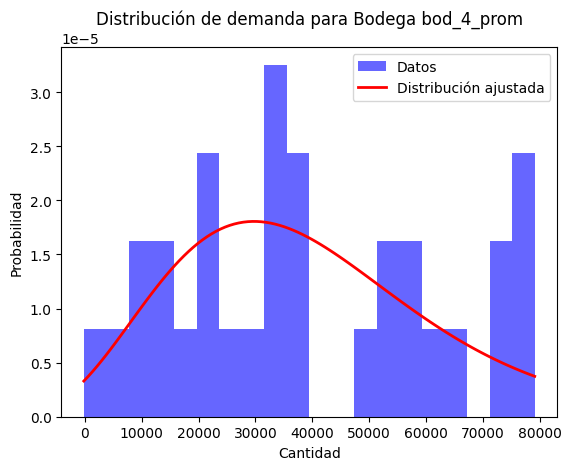

La mejor distribución para Bodega bod_8_alto es norm con parámetros (26662.418635103015, 10726.809908140205)
Estadístico KS: 0.07378704861076224
P-valor: 4.695716949384396e-09


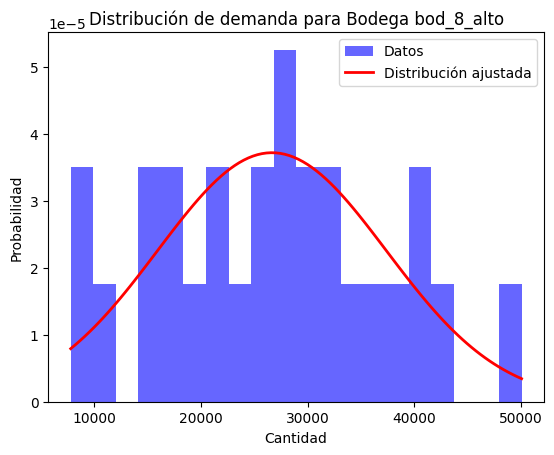

La mejor distribución para Bodega bod_8_prom es gamma con parámetros (3.0725042306641868, -1638.2328653350005, 4446.43788682499)
Estadístico KS: 0.11581481516129633
P-valor: 5.708774072884487e-09


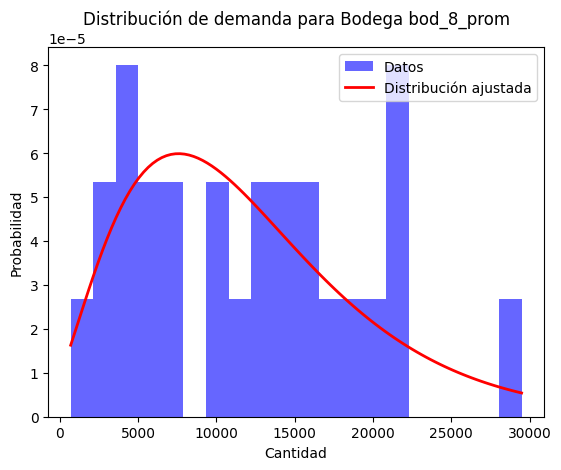

In [8]:
mejores_distribuciones = []

for i, b in enumerate(lista_bdd):
    
    nombre = nombres_bdd[i]
    
    # Ordeno por cantidad la base de datos
    b = b.sort_values(by=['Cantidad'], ascending=True)
    demanda = b['Cantidad']

    # Lista de distribuciones a ajustar
    distribuciones = [stats.norm, stats.expon, stats.geom, stats.t, stats.lognorm, stats.chi2, stats.beta, stats.gamma, stats.pareto]

    # Inicializamos valores
    mejor_distribucion = None
    mejor_params = ()
    mejor_kstest = float('inf')

    # Iteramos para las distintas distribuciones
    for distribucion in distribuciones:
        if distribucion == stats.geom:
            # Estimación para la distribución geométrica (funciona distinto a las demás)
            p_geom = 1 - np.mean(demanda)
            params = (p_geom,)
        else:
            # Estimación de los parámetros 
            params = distribucion.fit(demanda)
        
        ks_statistic, ks_p_value = stats.kstest(demanda, distribucion.name, params)
        
        # Compara el estadístico KS con el mejor encontrado hasta ahora
        if ks_statistic < mejor_kstest:
            mejor_distribucion = distribucion
            mejor_params = params
            mejor_kstest = ks_statistic

    # Imprimir información sobre la mejor distribución
    print(f"La mejor distribución para Bodega {nombre} es {mejor_distribucion.name} con parámetros {mejor_params}")
    print(f"Estadístico KS: {mejor_kstest}")
    print(f"P-valor: {ks_p_value}")

    # Gráfica de histograma 
    plt.hist(demanda, bins=20, density=True, alpha=0.6, color='b', label='Datos')
    x = np.linspace(min(demanda), max(demanda), 100)
    pdf = mejor_distribucion.pdf(x, *mejor_params)
    plt.plot(x, pdf, 'r-', lw=2, label='Distribución ajustada')
    plt.legend()
    plt.title(f'Distribución de demanda para Bodega {nombre}')
    
    # Leyenda de ejes
    plt.xlabel('Cantidad')
    plt.ylabel('Probabilidad')

    # Actualizar lista de mejores distribuciones
    mejores_distribuciones.append([nombre, mejor_distribucion.name, mejor_params])
    
    plt.show()


### Simulación con distribuciones encontradas para proyección

In [9]:
def dist_gamma(a, b, c, n):
    # Parámetros de la distribución gamma
    a, loc, scale = a,b,c

    # Generar 1000 muestras de la distribución gamma
    muestras = gamma.rvs(a, loc=loc, scale=scale, size=n)

    return muestras


In [10]:
def dist_expon(a,b, n):

    # Parámetros de la distribución exponencial
    loc, scale = a, b

    # Generar 1000 muestras de la distribución exponencial
    muestras = expon.rvs(loc=loc, scale=scale, size=n)

    return muestras




In [11]:
def dist_t(a,b,c, n):
    # Parámetros de la distribución t de Student
    df, loc, scale = a, b, c

    # Generar 1000 muestras de la distribución t de Student
    muestras = t.rvs(df, loc=loc, scale=scale, size=n)

    return muestras


In [12]:
def dist_norm(a,b, n):
    # Parámetros de la distribución normal
    loc, scale = a, b

    # Generar 1000 muestras de la distribución normal
    muestras = norm.rvs(loc=loc, scale=scale, size=n)

    return muestras

In [13]:
# Ahora código de simulación para cada bodega, considerando un número proporcional de semanas según se cantidad

dataframes = []

# Esto porque sino tienen números decimales
cantidad_aprox = 10000
n = 52* (1 + cantidad_aprox//52)

# Simulamos para cada bodega
for i, bdd in enumerate(lista_bdd):
    nombre = nombres_bdd[i]
    distribucion = mejores_distribuciones[i][1]
    parametros = mejores_distribuciones[i][2]
    cant_simulaciones = int(len(lista_semanas[i])*n/52)
    if distribucion == "gamma":
        dataframes.append(dist_gamma(parametros[0], parametros[1], parametros[2], cant_simulaciones))
    elif distribucion == "expon":
        dataframes.append(dist_expon(parametros[0], parametros[1], cant_simulaciones))
    elif distribucion == "t":
        dataframes.append(dist_t(parametros[0], parametros[1], parametros[2], cant_simulaciones))
    elif distribucion == "norm":
        dataframes.append(dist_norm(parametros[0], parametros[1], cant_simulaciones))

In [14]:
# Hacemos df de las semanas altas y promedio para cada bodega
bod_1_alto_sim = pd.DataFrame(dataframes[0])
bod_1_prom_sim = pd.DataFrame(dataframes[1])
bod_4_alto_sim = pd.DataFrame(dataframes[2])
bod_4_prom_sim = pd.DataFrame(dataframes[3])
bod_8_alto_sim = pd.DataFrame(dataframes[4])
bod_8_prom_sim = pd.DataFrame(dataframes[5])

# Entregamos una nueva columna al df de cada bodega. Esta tiene que tener semanas de lista_semanas[i] y se repite n veces
bod_1_alto_sim["Semana"] = np.repeat(lista_semanas[0], n/52)
bod_1_prom_sim["Semana"] = np.repeat(lista_semanas[1], n/52)
bod_4_alto_sim["Semana"] = np.repeat(lista_semanas[2], n/52)
bod_4_prom_sim["Semana"] = np.repeat(lista_semanas[3], n/52)
bod_8_alto_sim["Semana"] = np.repeat(lista_semanas[4], n/52)
bod_8_prom_sim["Semana"] = np.repeat(lista_semanas[5], n/52)

# Juntamos las bdd por bodega 
bod_1_sim = pd.concat([bod_1_alto_sim, bod_1_prom_sim])
bod_4_sim = pd.concat([bod_4_alto_sim, bod_4_prom_sim])
bod_8_sim = pd.concat([bod_8_alto_sim, bod_8_prom_sim])

# Ordenamos por Semana
bod_1_sim = bod_1_sim.sort_values(by=['Semana'], ascending=True)
bod_4_sim = bod_4_sim.sort_values(by=['Semana'], ascending=True)
bod_8_sim = bod_8_sim.sort_values(by=['Semana'], ascending=True)

In [15]:
# Creamos una columna de "Bodega" a cada df
bod_1_sim["Bodega"] = 1
bod_4_sim["Bodega"] = 4
bod_8_sim["Bodega"] = 8

# Cambiamos el nombre de la columna de la cantidad
bod_1_sim = bod_1_sim.rename(columns={0: "Cantidad"})
bod_4_sim = bod_4_sim.rename(columns={0: "Cantidad"})
bod_8_sim = bod_8_sim.rename(columns={0: "Cantidad"})


In [16]:
# Juntamos las bases de datos de las bodegas
simulacion = pd.concat([bod_1_sim, bod_4_sim, bod_8_sim])

# Pasamos los resultados a excel
# simulacion.to_excel("Resultados/simulacion_proy.xlsx")

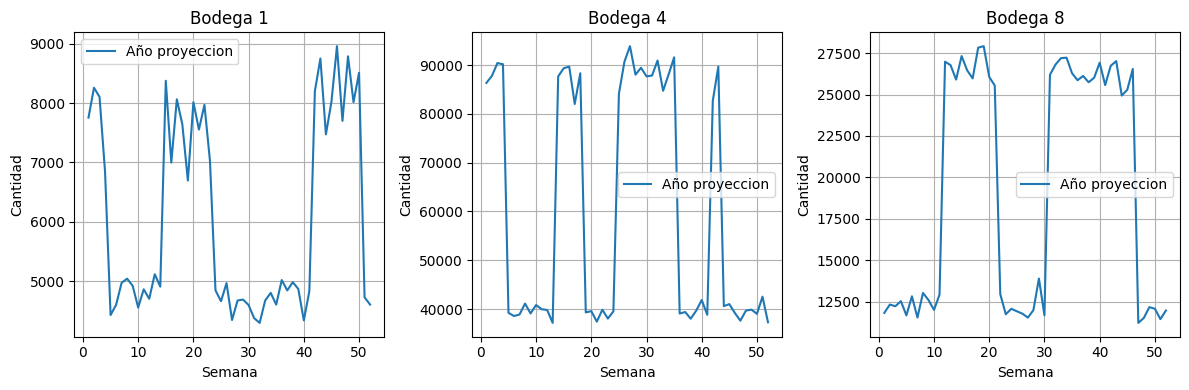

In [17]:

bodegas = {1: simulacion[simulacion["Bodega"]==1], 4: simulacion[simulacion["Bodega"]==4], 8: simulacion[simulacion["Bodega"]==8]}

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila y 3 columnas para los tres gráficos

for i, bodega in enumerate([1, 4, 8]):
    #"2017","2018","2019","2020","2021","2022"
    data = bodegas[bodega]

    # Obtenemos el promedio para las semanas que tienen el mismo número
    data = data.groupby(['Semana']).agg({"Cantidad": "mean"}).reset_index()
    
    data["Semana"] = data["Semana"].astype(int)
    #data = data[data["Semana"] > 0]
    #data = data[data["Semana"] < 14]
    axs[i].plot(data['Semana'], data['Cantidad'], label=f'Año proyeccion')

    axs[i].set_xlabel('Semana')
    axs[i].set_ylabel('Cantidad')
    axs[i].set_title(f'Bodega {bodega}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()  
plt.show()






### ...

C:\Users\U\AppData\Local\Temp\ipykernel_2320\3760778475.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resultados["Semana"] = data_resultados["Semana"].astype(int)
C:\Users\U\AppData\Local\Temp\ipykernel_2320\3760778475.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_resultados["Semana"] = data_resultados["Semana"].astype(int)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Us

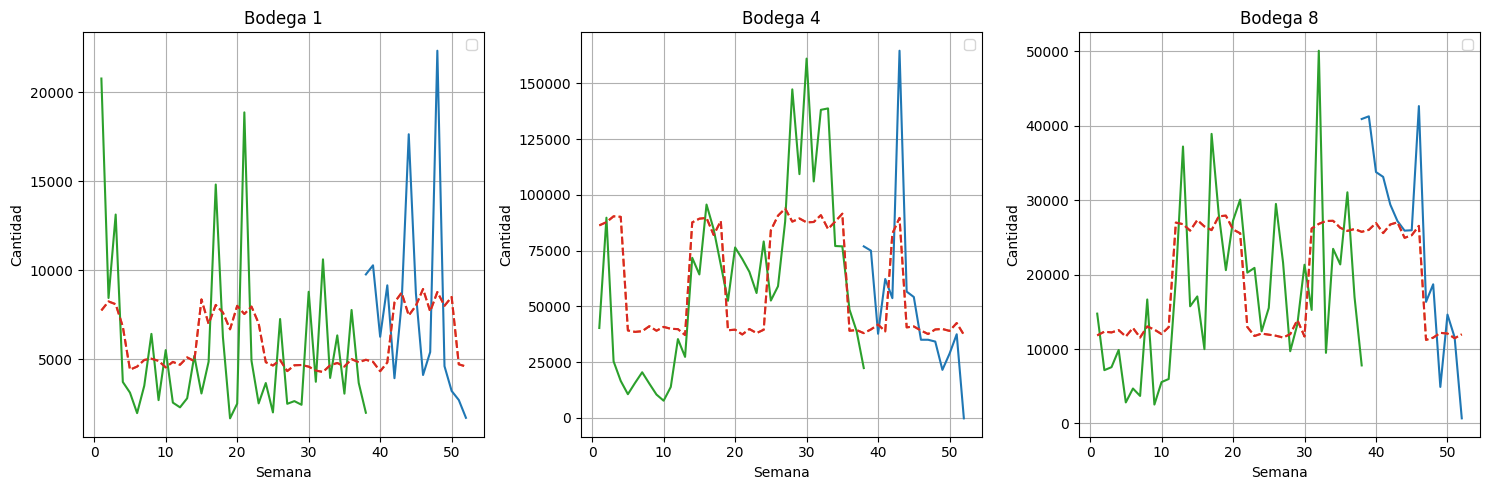

In [23]:
# Código para el primer conjunto de gráficos
bodegas_resultados = {1: resultado_3[resultado_3["Bodega Asignada"]==1], 
                      4: resultado_3[resultado_3["Bodega Asignada"]==4], 
                      8: resultado_3[resultado_3["Bodega Asignada"]==8]}

# Código para el segundo conjunto de datos (simulación)
bodegas_simulacion = {1: simulacion[simulacion["Bodega"]==1], 
                       4: simulacion[simulacion["Bodega"]==4], 
                       8: simulacion[simulacion["Bodega"]==8]}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila y 3 columnas para los tres gráficos

for i, bodega in enumerate([1, 4, 8]):
    for año in ["2031", "2032"]:
        # Resultados
        data_resultados = bodegas_resultados[bodega][bodegas_resultados[bodega]["Año"] == año]
        data_resultados["Semana"] = data_resultados["Semana"].astype(int)
        data_resultados = data_resultados[data_resultados["Semana"] > 0]
        
        # Simulación
        data_simulacion = bodegas_simulacion[bodega]
        data_simulacion = data_simulacion.groupby(['Semana']).agg({"Cantidad": "mean"}).reset_index()
        data_simulacion["Semana"] = data_simulacion["Semana"].astype(int)

        # Superponer gráficos
        axs[i].plot(data_resultados['Semana'], data_resultados['Cantidad']) #label=f'Año {año}'
        axs[i].plot(data_simulacion['Semana'], data_simulacion['Cantidad'],linestyle='dashed') #label=f'Año {año}', 

    axs[i].set_xlabel('Semana')
    axs[i].set_ylabel('Cantidad')
    axs[i].set_title(f'Bodega {bodega}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()  
plt.show()

C:\Users\U\AppData\Local\Temp\ipykernel_2320\3437160294.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Semana"] = data["Semana"].astype(int)
C:\Users\U\AppData\Local\Temp\ipykernel_2320\3437160294.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Semana"] = data["Semana"].astype(int)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\U\AppData\Local\Temp\ipykernel_2320\3437

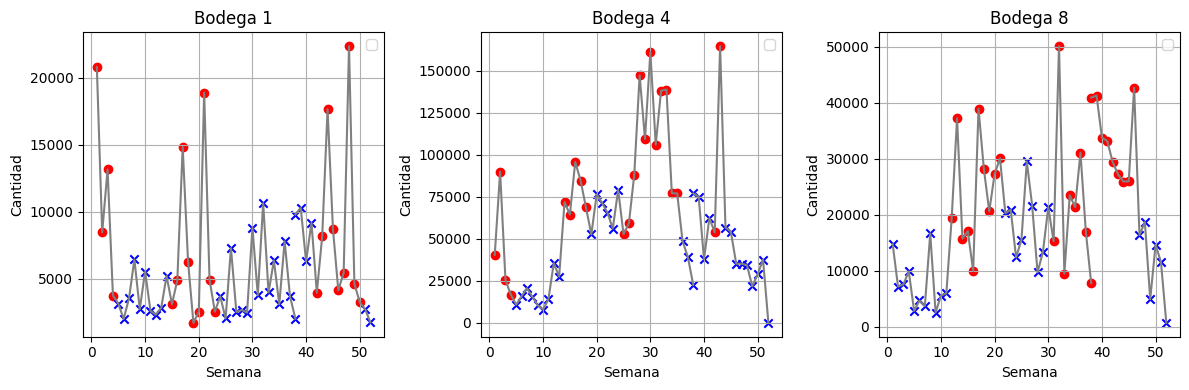

In [34]:
# Datos de resultado_3
bodegas = {1: resultado_3[resultado_3["Bodega Asignada"]==1], 
           4: resultado_3[resultado_3["Bodega Asignada"]==4], 
           8: resultado_3[resultado_3["Bodega Asignada"]==8]}

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila y 3 columnas para los tres gráficos

for i, bodega in enumerate([1, 4, 8]):
    for año in ["2031", "2032"]:
        data = bodegas[bodega][bodegas[bodega]["Año"] == año]
        data["Semana"] = data["Semana"].astype(int)
        data = data[data["Semana"] > 0]

        # Filtrar datos para semanas altas y promedio
        if bodega == 1:
            semanas_alto = semanas_alto_bod_1
            semanas_promedio = semanas_promedio_bod_1
        elif bodega == 4:
            semanas_alto = semanas_alto_bod_4
            semanas_promedio = semanas_promedio_bod_4
        elif bodega == 8:
            semanas_alto = semanas_alto_bod_8
            semanas_promedio = semanas_promedio_bod_8

        data_alto = data[data["Semana"].isin(semanas_alto)]
        data_promedio = data[data["Semana"].isin(semanas_promedio)]

        # Graficar semanas altas y promedio con colores distintos en la misma línea
        axs[i].plot(data['Semana'], data['Cantidad'], color='gray')
        axs[i].scatter(data_alto['Semana'], data_alto['Cantidad'], color='red')
        axs[i].scatter(data_promedio['Semana'], data_promedio['Cantidad'], color='blue', marker='x')

    axs[i].set_xlabel('Semana')
    axs[i].set_ylabel('Cantidad')
    axs[i].set_title(f'Bodega {bodega}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

C:\Users\U\AppData\Local\Temp\ipykernel_2320\859416698.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_año["Semana"] = data_año["Semana"].astype(int)
C:\Users\U\AppData\Local\Temp\ipykernel_2320\859416698.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_año["Semana"] = data_año["Semana"].astype(int)
C:\Users\U\AppData\Local\Temp\ipykernel_2320\859416698.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

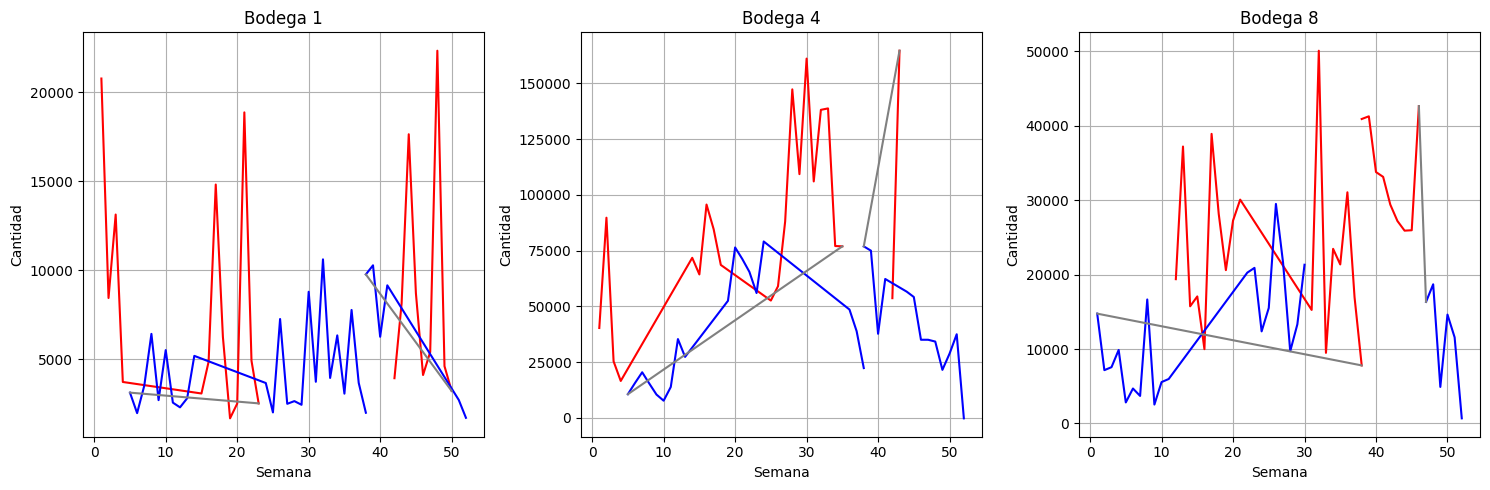

In [32]:
from matplotlib.collections import LineCollection
import numpy as np

# Datos de resultado_3
bodegas = {1: resultado_3[resultado_3["Bodega Asignada"]==1], 
           4: resultado_3[resultado_3["Bodega Asignada"]==4], 
           8: resultado_3[resultado_3["Bodega Asignada"]==8]}


fig, axs = plt.subplots(1, len(bodegas), figsize=(15, 5))  # 1 fila y n columnas para las bodegas

for i, (bodega, data) in enumerate(bodegas.items()):
    for año in ["2031", "2032"]:
        data_año = data[data["Año"] == año]
        data_año["Semana"] = data_año["Semana"].astype(int)
        data_año = data_año[data_año["Semana"] > 0]

        # Filtrar datos para semanas altas y promedio
        if bodega == 1:
            semanas_alto = semanas_alto_bod_1
            semanas_promedio = semanas_promedio_bod_1
        elif bodega == 4:
            semanas_alto = semanas_alto_bod_4
            semanas_promedio = semanas_promedio_bod_4
        elif bodega == 8:
            semanas_alto = semanas_alto_bod_8
            semanas_promedio = semanas_promedio_bod_8

        data_alto = data_año[data_año["Semana"].isin(semanas_alto)]
        data_promedio = data_año[data_año["Semana"].isin(semanas_promedio)]
        data_otras = data_año[~data_año["Semana"].isin(semanas_alto + semanas_promedio)]

        # Ordenar los datos por semana
        data_otras = data_otras.sort_values(by='Semana')
        data_alto = data_alto.sort_values(by='Semana')
        data_promedio = data_promedio.sort_values(by='Semana')

        # Graficar las líneas con diferentes colores
        axs[i].plot(data_otras['Semana'], data_otras['Cantidad'], color='gray')
        axs[i].plot(data_alto['Semana'], data_alto['Cantidad'], color='red')
        axs[i].plot(data_promedio['Semana'], data_promedio['Cantidad'], color='blue')

        # Conectar las líneas
        if not data_alto.empty and not data_promedio.empty:
            axs[i].plot([data_alto['Semana'].iloc[-1], data_promedio['Semana'].iloc[0]],
                        [data_alto['Cantidad'].iloc[-1], data_promedio['Cantidad'].iloc[0]],
                        color='gray')

    axs[i].set_xlabel('Semana')
    axs[i].set_ylabel('Cantidad')
    axs[i].set_title(f'Bodega {bodega}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()